In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/amazon-sales-data-analysis/AmazonSalesData.csv")

# Display the first few rows
print(df.head())

                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [20]:
# Get basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB
None
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Da

In [25]:
# Get descriptive statistics
print(df.describe())

                Order Date      Order ID            Ship Date   Units Sold  \
count                  100  1.000000e+02                  100   100.000000   
mean   2013-09-16 14:09:36  5.550204e+08  2013-10-09 22:48:00  5128.710000   
min    2010-02-02 00:00:00  1.146066e+08  2010-02-25 00:00:00   124.000000   
25%    2012-02-14 12:00:00  3.389225e+08  2012-02-24 18:00:00  2836.250000   
50%    2013-07-12 12:00:00  5.577086e+08  2013-08-11 12:00:00  5382.500000   
75%    2015-04-07 00:00:00  7.907551e+08  2015-04-28 00:00:00  7369.000000   
max    2017-05-22 00:00:00  9.940222e+08  2017-06-17 00:00:00  9925.000000   
std                    NaN  2.606153e+08                  NaN  2794.484562   

       Unit Price   Unit Cost  Total Revenue    Total Cost  Total Profit  
count  100.000000  100.000000   1.000000e+02  1.000000e+02  1.000000e+02  
mean   276.761300  191.048000   1.373488e+06  9.318057e+05  4.416820e+05  
min      9.330000    6.920000   4.870260e+03  3.612240e+03  1.258020e+03

In [29]:
# Calculate total sales and profit
total_sales = df['Total Revenue'].sum()
total_profit = df['Total Profit'].sum()
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")


Total Sales: 137348768.31
Total Profit: 44168198.39999999


In [30]:
# Sales and profit by region
sales_by_region = df.groupby('Region')['Total Revenue'].sum()
profit_by_region = df.groupby('Region')['Total Profit'].sum()
print(sales_by_region)
print(profit_by_region)


Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64
Region
Asia                                  6113845.87
Australia and Oceania                 4722160.03
Central America and the Caribbean     2846907.85
Europe                               11082938.63
Middle East and North Africa          5761191.86
North America                         1457942.76
Sub-Saharan Africa                   12183211.40
Name: Total Profit, dtype: float64


In [31]:
# Sales and profit by country
sales_by_country = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)
profit_by_country = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False)
print(sales_by_country)
print(profit_by_country)


Country
Honduras        6336545.48
Myanmar         6161257.90
Djibouti        6052890.86
Turkmenistan    5822036.20
Mexico          5643356.55
                   ...    
Syria             35304.72
Slovakia          26344.26
New Zealand       20404.71
Kyrgyzstan        19103.44
Kuwait             4870.26
Name: Total Revenue, Length: 76, dtype: float64
Country
Djibouti       2425317.87
Myanmar        1802771.70
Pakistan       1719922.04
Samoa          1678540.98
Honduras       1609947.52
                  ...    
Slovakia         10795.23
Syria             9119.44
Kyrgyzstan        7828.12
New Zealand       5270.67
Kuwait            1258.02
Name: Total Profit, Length: 76, dtype: float64


In [32]:
# Sales and profit by item type
sales_by_item = df.groupby('Item Type')['Total Revenue'].sum()
profit_by_item = df.groupby('Item Type')['Total Profit'].sum()
print(sales_by_item)
print(profit_by_item)


Item Type
Baby Food          10350327.60
Beverages           2690794.60
Cereal              5322898.90
Clothes             7787292.80
Cosmetics          36601509.60
Fruits               466481.34
Household          29889712.29
Meat                4503675.75
Office Supplies    30585380.07
Personal Care       3980904.84
Snacks              2080733.46
Vegetables          3089057.06
Name: Total Revenue, dtype: float64
Item Type
Baby Food           3886643.70
Beverages            888047.28
Cereal              2292443.43
Clothes             5233334.40
Cosmetics          14556048.66
Fruits               120495.18
Household           7412605.71
Meat                 610610.00
Office Supplies     5929583.75
Personal Care       1220622.48
Snacks               751944.18
Vegetables          1265819.63
Name: Total Profit, dtype: float64


In [33]:
# Sales and profit by sales channel
sales_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum()
profit_by_channel = df.groupby('Sales Channel')['Total Profit'].sum()
print(sales_by_channel)
print(profit_by_channel)


Sales Channel
Offline    79094809.20
Online     58253959.11
Name: Total Revenue, dtype: float64
Sales Channel
Offline    24920726.67
Online     19247471.73
Name: Total Profit, dtype: float64


In [34]:
# Total revenue and profit by order priority
revenue_by_priority = df.groupby('Order Priority')['Total Revenue'].sum()
profit_by_priority = df.groupby('Order Priority')['Total Profit'].sum()
print(revenue_by_priority)
print(profit_by_priority)


Order Priority
C    18855063.05
H    48749546.05
L    36628127.46
M    33116031.75
Name: Total Revenue, dtype: float64
Order Priority
C     6748328.46
H    16891599.58
L    10858727.86
M     9669542.50
Name: Total Profit, dtype: float64


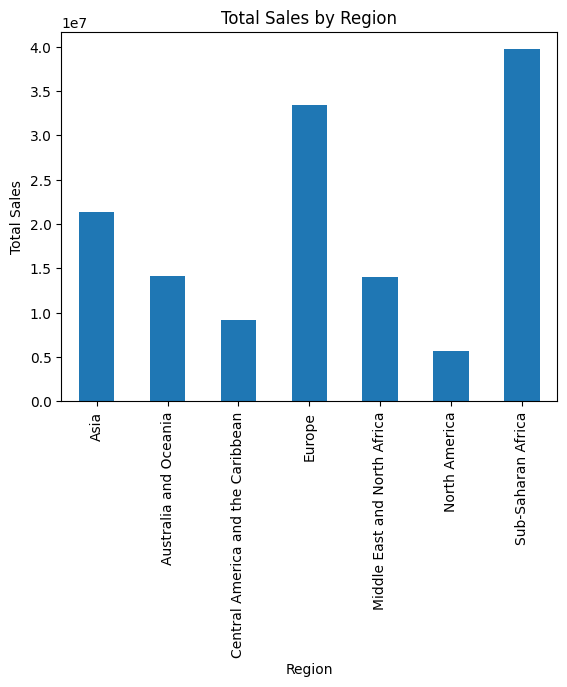

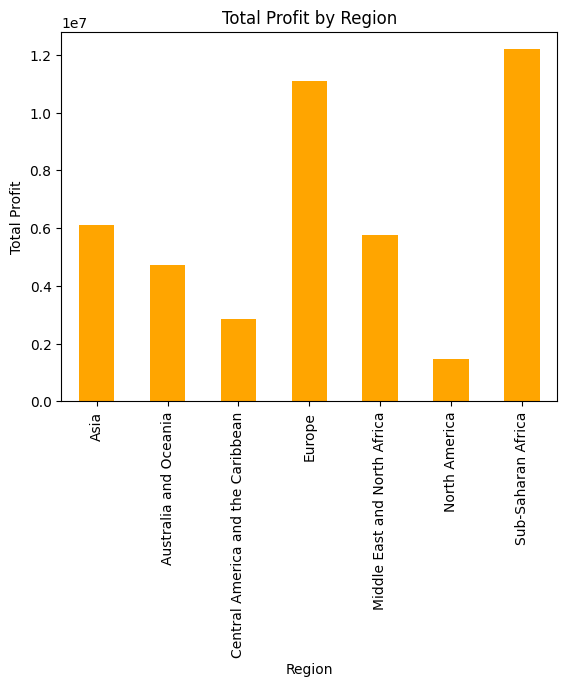

In [35]:
import matplotlib.pyplot as plt

# Plot sales by region
sales_by_region.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Plot profit by region
profit_by_region.plot(kind='bar', color='orange')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


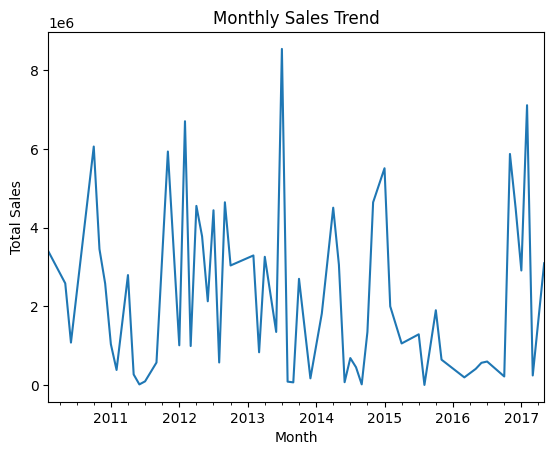

In [36]:
# Sales over time
sales_over_time = df.groupby(df['Order Date'].dt.to_period('M'))['Total Revenue'].sum()
sales_over_time.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


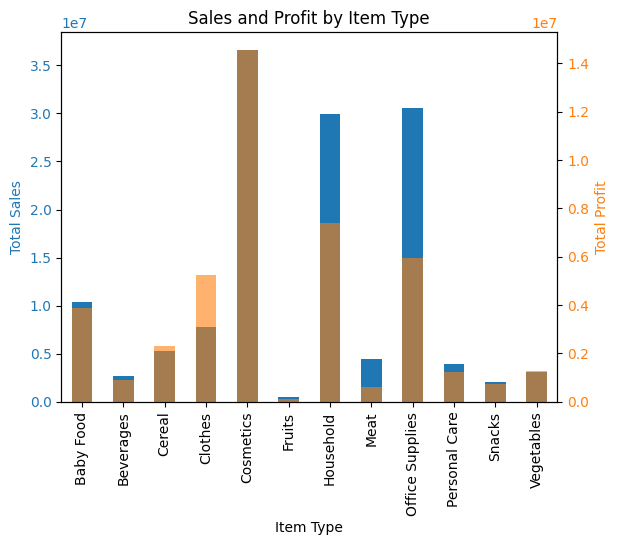

In [37]:
# Plot sales and profit by item type
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Item Type')
ax1.set_ylabel('Total Sales', color=color)
sales_by_item.plot(kind='bar', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Total Profit', color=color)
profit_by_item.plot(kind='bar', ax=ax2, color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sales and Profit by Item Type')
plt.show()


In [38]:
# Compute correlation matrix
correlation_matrix = df[['Total Revenue', 'Total Cost', 'Total Profit']].corr()
print(correlation_matrix)


               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


In [39]:
# Calculate order fulfillment time
df['Fulfillment Time'] = (df['Ship Date'] - df['Order Date']).dt.days
print(df['Fulfillment Time'].describe())


count    100.000000
mean      23.360000
std       14.742586
min        0.000000
25%        9.750000
50%       23.500000
75%       36.250000
max       50.000000
Name: Fulfillment Time, dtype: float64


In [77]:
total_revenue = df['Total Revenue'].sum()
total_profit = df['Total Profit'].sum()
units_sold = df['Units Sold'].sum()

print(f'Total Revenue: ${total_revenue}')
print(f'Total Profit: ${total_profit}')
print(f'Units Sold: {units_sold}')


Total Revenue: $-0.7986219825850733
Total Profit: $-1.168191907356121
Units Sold: -1.7249881745721876


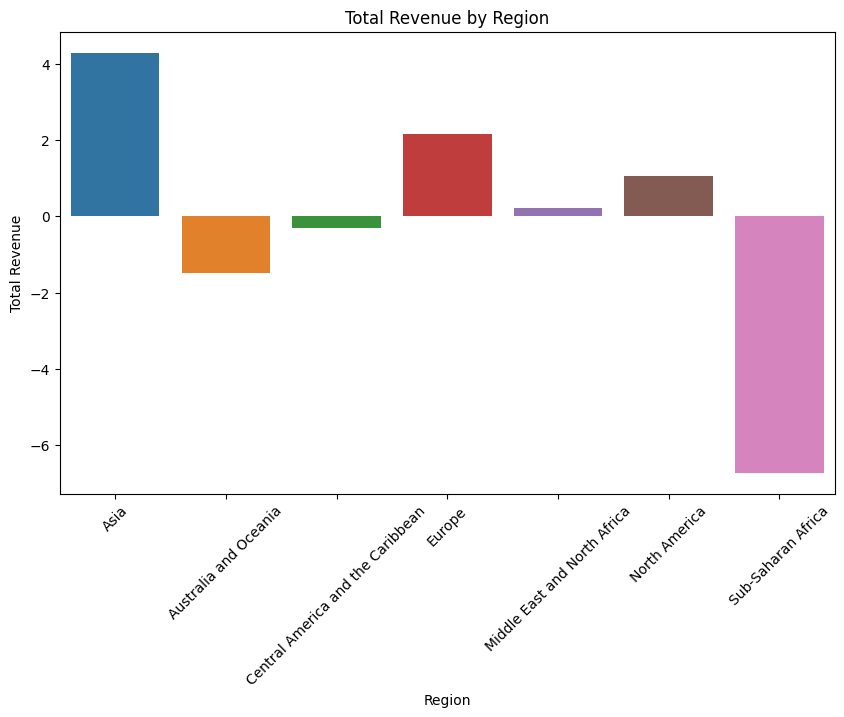

In [78]:
revenue_by_region = df.groupby('Region')['Total Revenue'].sum().reset_index()
profit_by_region = df.groupby('Region')['Total Profit'].sum().reset_index()
units_sold_by_region = df.groupby('Region')['Units Sold'].sum().reset_index()

revenue_by_country = df.groupby('Country')['Total Revenue'].sum().reset_index()
profit_by_country = df.groupby('Country')['Total Profit'].sum().reset_index()
units_sold_by_country = df.groupby('Country')['Units Sold'].sum().reset_index()

revenue_by_item_type = df.groupby('Item Type')['Total Revenue'].sum().reset_index()
profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum().reset_index()
units_sold_by_item_type = df.groupby('Item Type')['Units Sold'].sum().reset_index()

revenue_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()
profit_by_channel = df.groupby('Sales Channel')['Total Profit'].sum().reset_index()
units_sold_by_channel = df.groupby('Sales Channel')['Units Sold'].sum().reset_index()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Revenue', data=revenue_by_region)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


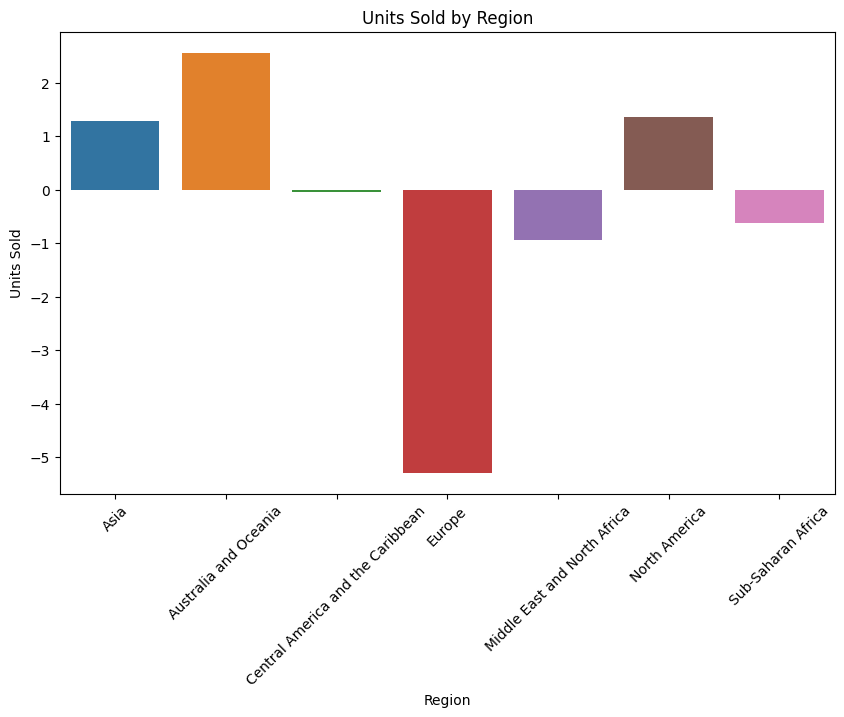

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Units Sold', data=units_sold_by_region)
plt.title('Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


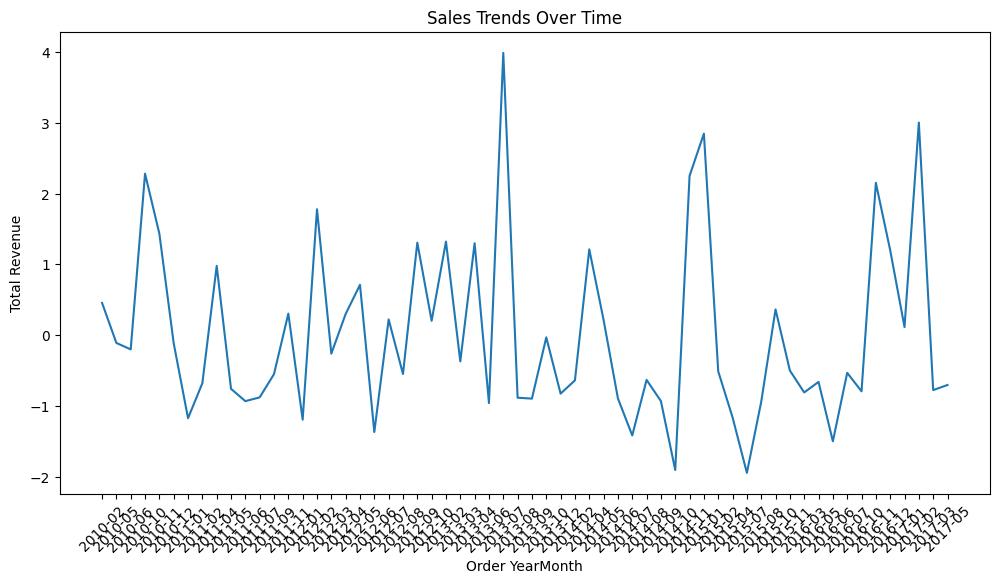

In [56]:
df['Order YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_revenue = df.groupby('Order YearMonth')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Order YearMonth'].astype(str), monthly_revenue['Total Revenue'])
plt.title('Sales Trends Over Time')
plt.xlabel('Order YearMonth')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [61]:
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']
profit_margin_by_item = df.groupby('Item Type')['Profit Margin'].mean().reset_index()
profit_margin_by_region = df.groupby('Region')['Profit Margin'].mean().reset_index()



In [63]:
profit_margin_by_item = df.groupby('Item Type')['Profit Margin'].mean().reset_index()
profit_margin_by_region = df.groupby('Region')['Profit Margin'].mean().reset_index()


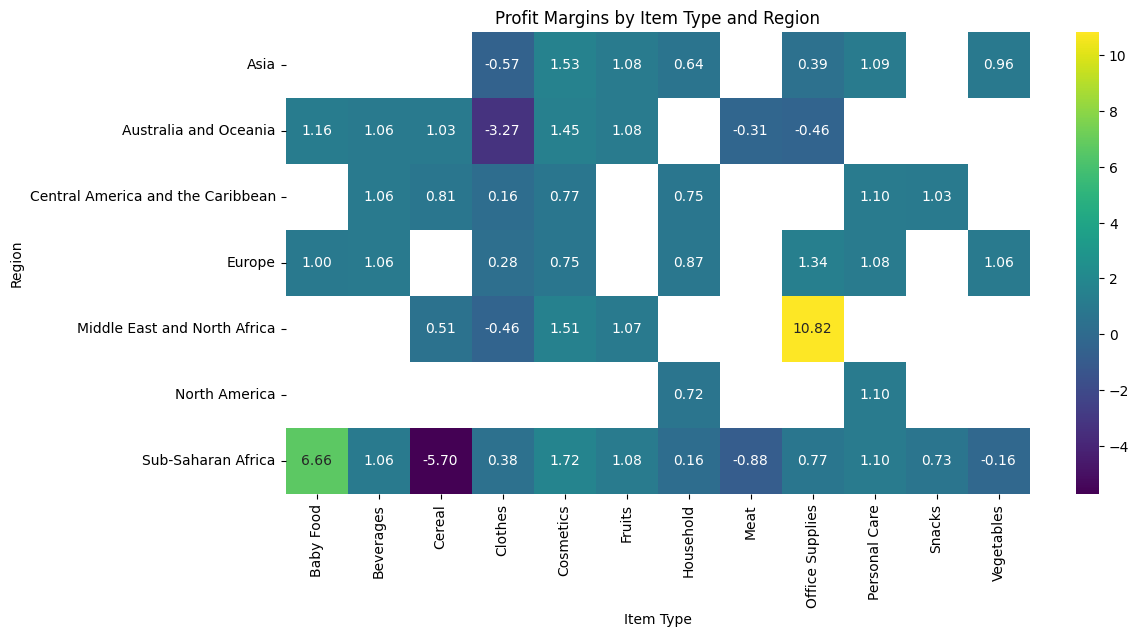

In [64]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.pivot_table(df, values='Profit Margin', index='Region', columns='Item Type'), annot=True, fmt=".2f", cmap='viridis')
plt.title('Profit Margins by Item Type and Region')
plt.show()


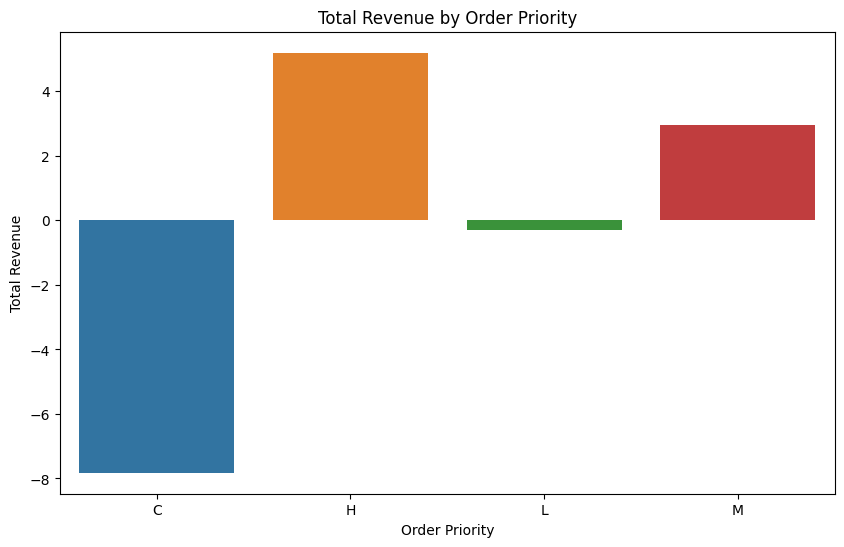

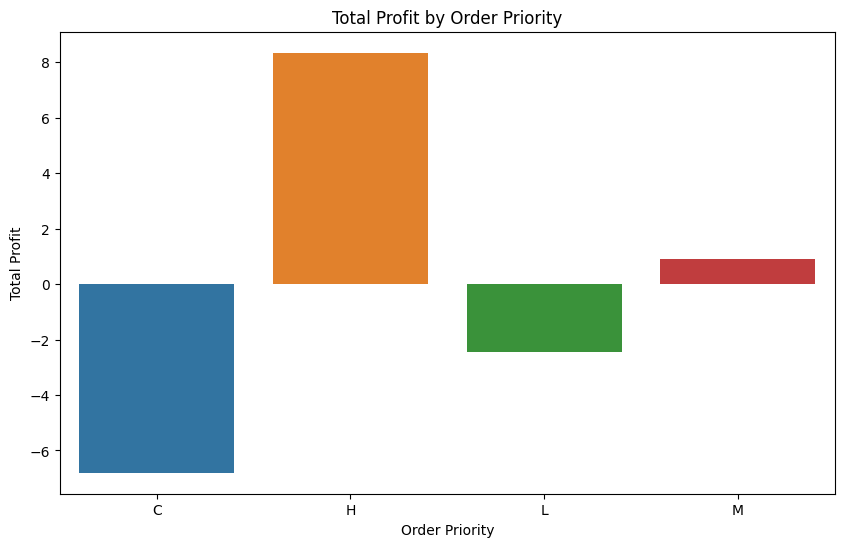

In [66]:
priority_analysis = df.groupby('Order Priority')[['Total Revenue', 'Total Profit']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Order Priority', y='Total Revenue', data=priority_analysis)
plt.title('Total Revenue by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Order Priority', y='Total Profit', data=priority_analysis)
plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.show()


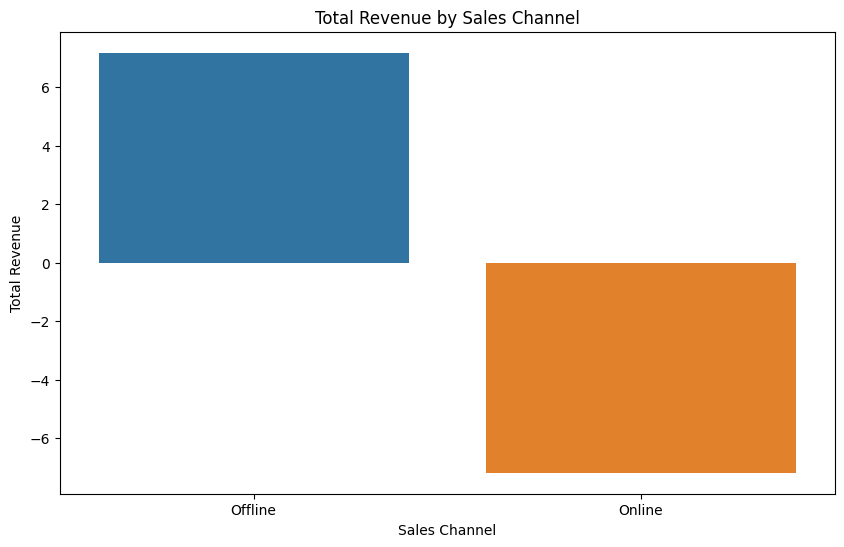

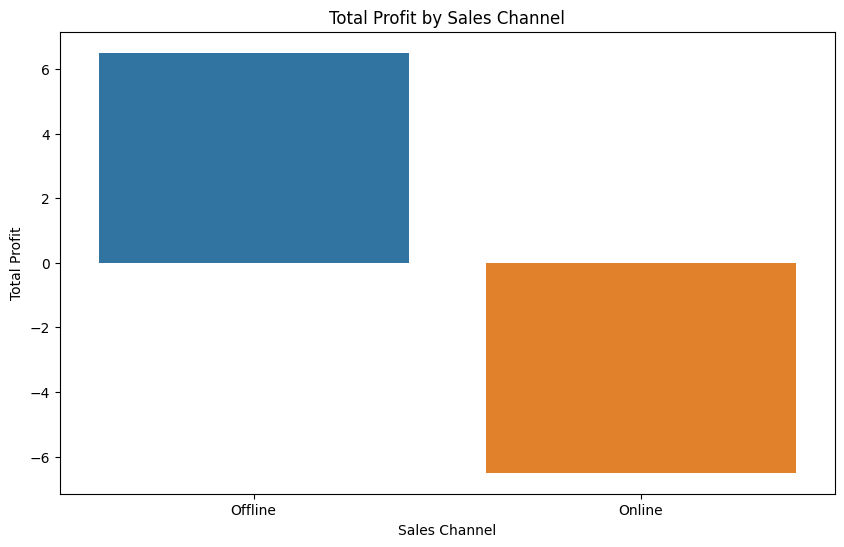

In [68]:
sales_by_channel = df.groupby('Sales Channel')[['Total Revenue', 'Total Profit', 'Units Sold']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Channel', y='Total Revenue', data=sales_by_channel)
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Channel', y='Total Profit', data=sales_by_channel)
plt.title('Total Profit by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.show()


In [69]:
sales_by_country = df.groupby('Country')[['Total Revenue', 'Total Profit']].sum().reset_index()
import plotly.express as px

fig = px.choropleth(sales_by_country, locations='Country', locationmode='country names', color='Total Revenue', title='Geographical Sales Distribution')
fig.show()


In [70]:
df['Elasticity'] = (df['Units Sold'].pct_change() / df['Unit Price'].pct_change())
import statsmodels.api as sm

X = df[['Unit Price']]
X = sm.add_constant(X)
y = df['Units Sold']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Units Sold   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4893
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.486
Time:                        19:54:34   Log-Likelihood:                -141.64
No. Observations:                 100   AIC:                             287.3
Df Residuals:                      98   BIC:                             292.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.163e-17      0.101  -4.13e-16      1.0

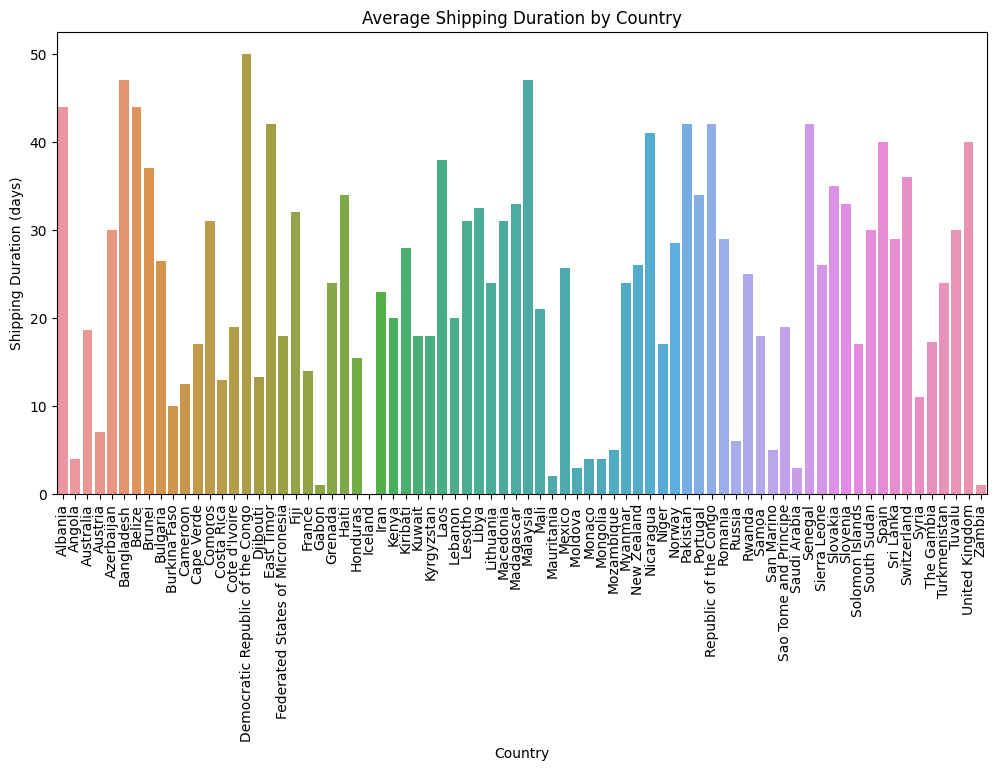

In [71]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
shipping_analysis = df.groupby('Country')['Shipping Duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Shipping Duration', data=shipping_analysis)
plt.title('Average Shipping Duration by Country')
plt.xlabel('Country')
plt.ylabel('Shipping Duration (days)')
plt.xticks(rotation=90)
plt.show()
